In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


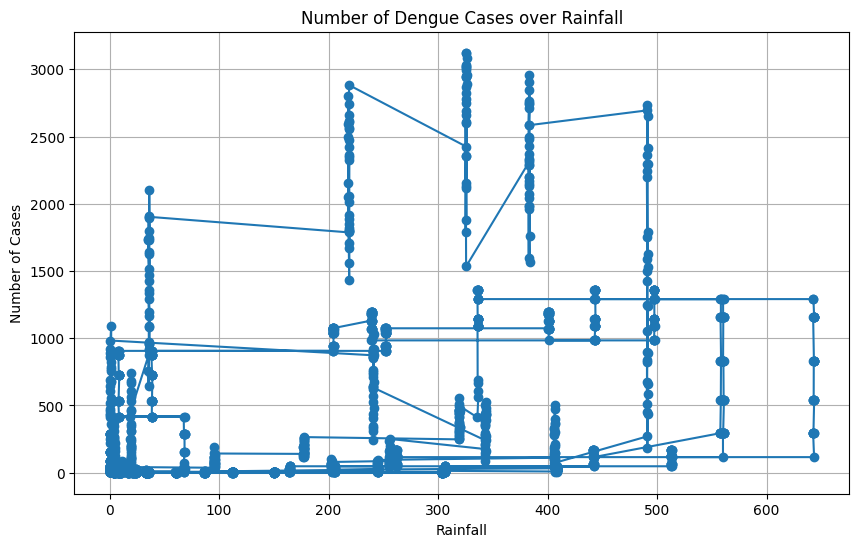

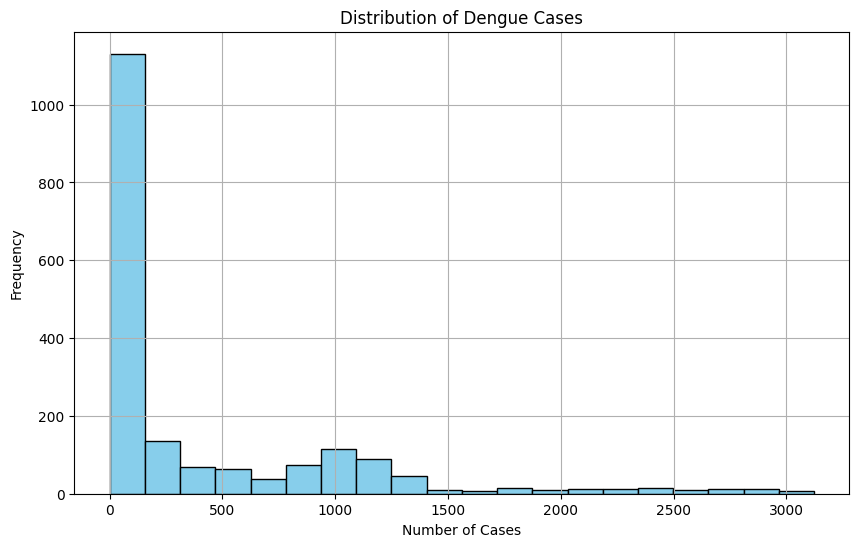

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/DenguePractice/DengueDataNoMissingValue.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Fill missing values in 'caseNo' column with mean
df['caseNo'].fillna(df['caseNo'].mean(), inplace=True)

# Data Visualization
# Line plot of 'caseNo' over 'week'
plt.figure(figsize=(10, 6))
plt.plot(df['rainfall'], df['caseNo'], marker='o', linestyle='-')
plt.title('Number of Dengue Cases over Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

# Histogram of 'caseNo'
plt.figure(figsize=(10, 6))
plt.hist(df['caseNo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dengue Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
#df = pd.read_csv("/content/drive/MyDrive/DenguePractice/DengueDataNoMissingValue.csv")

# Drop the 'date' column
df = df.drop(columns=['date'])
df = df.drop(columns=['week'])
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define threshold for identifying outliers and extreme values
outlier_threshold = 1.5
extreme_threshold = 3

# Identify outliers and extreme values
outliers = (df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))
extremes = (df < (Q1 - extreme_threshold * IQR)) | (df > (Q3 + extreme_threshold * IQR))

# Delete rows containing outliers and extreme values
df_cleaned = df[~outliers.any(axis=1) & ~extremes.any(axis=1)]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)



# Load dataset
df = df_cleaned
# df = df.reset_index(drop=True, inplace=True)
# Separate features and target
X = df[[ 'max temp', 'min temp', 'rainfall', 'humidity']]
y = df['caseNo']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

# Perform cross-validation and evaluation
results = {}
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "CV Scores": cv_scores,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-squared": r2
    }
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)



# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print("Cross-validation scores:", result["CV Scores"])
    print("Mean Absolute Error:", result["Mean Absolute Error"])
    print("Mean Squared Error:", result["Mean Squared Error"])
    print("Root Mean Squared Error:", result["Root Mean Squared Error"])
    print("R-squared:", result["R-squared"])
    print("")

Original DataFrame shape: (1881, 5)
Cleaned DataFrame shape: (1775, 5)
Model: KNN
Cross-validation scores: [-103954.05385915 -317744.47785915 -242806.07583099 -241920.31571831
 -102308.36259155]
Mean Absolute Error: 77.3481690140845
Mean Squared Error: 23449.058816901408
Root Mean Squared Error: 153.13085520854838
R-squared: 0.8648826167090256

Model: Random Forest
Cross-validation scores: [-283696.58848394 -175662.85468958  -92441.65679296 -133358.38818704
  -60667.63185606]
Mean Absolute Error: 92.6750704225352
Mean Squared Error: 31445.851137746482
Root Mean Squared Error: 177.32978074126885
R-squared: 0.8188037671675188

Model: Decision Tree
Cross-validation scores: [-400349.4        -239058.81408451 -139884.66478873 -288275.94647887
  -69220.42535211]
Mean Absolute Error: 98.10985915492958
Mean Squared Error: 46358.17183098591
Root Mean Squared Error: 215.30947919445143
R-squared: 0.7328764910836671

Model: XGBoost
Cross-validation scores: [-246344.24223505 -164472.88095871  -9192

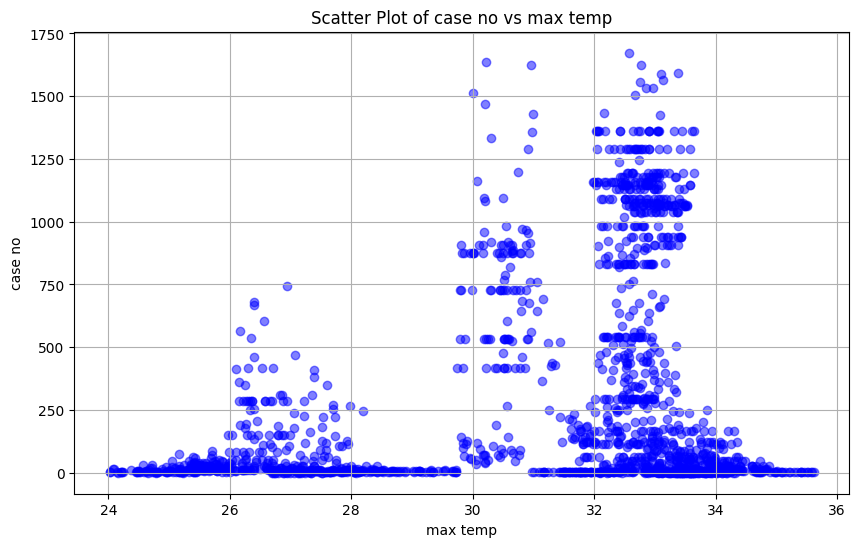

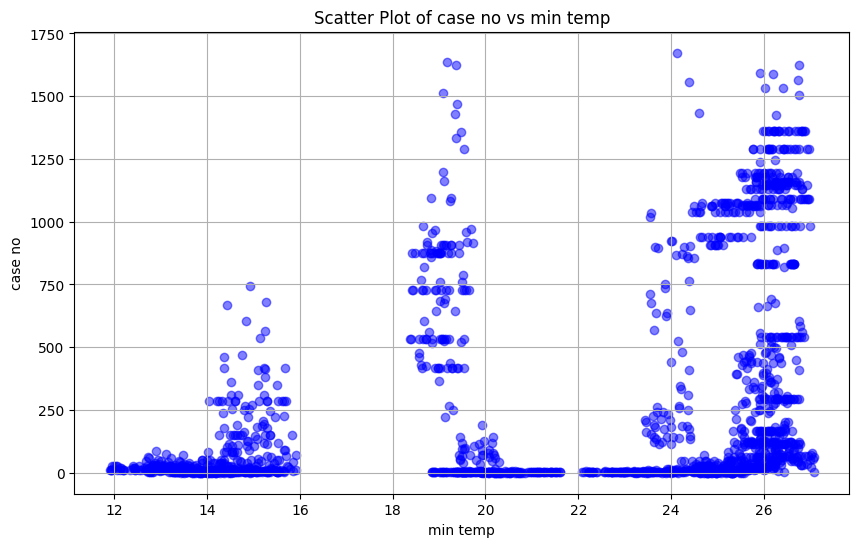

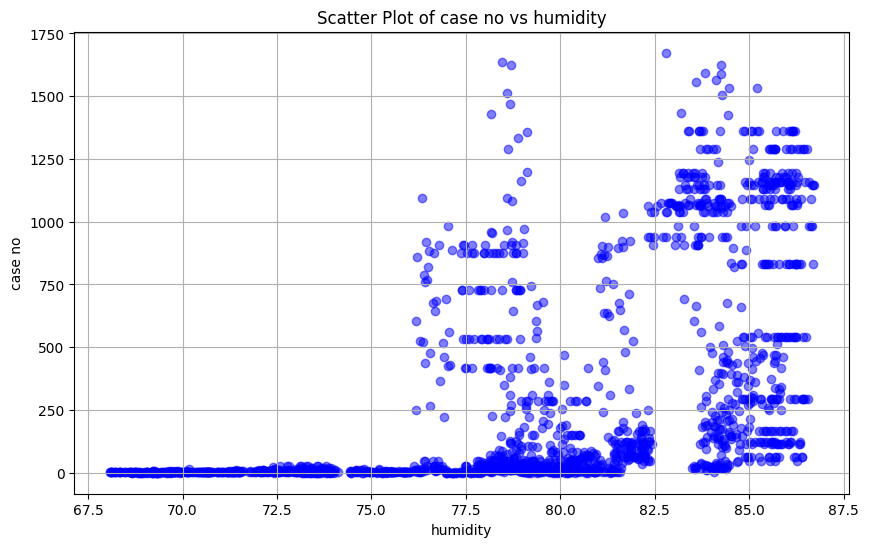

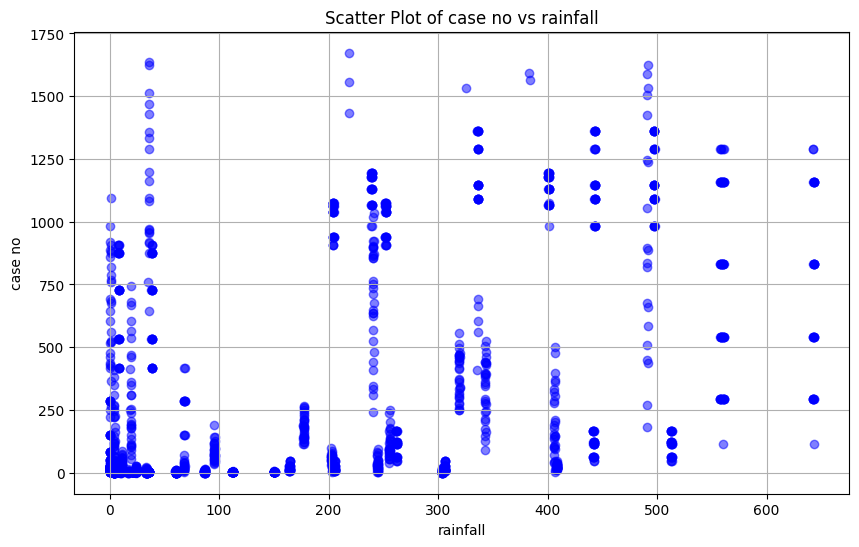

In [ ]:


# Load dataset
#df = pd.read_csv('/content/DengueDataNoMissingValue.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Scatter plot for 'caseNo' vs all other columns
num_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns only

for col in num_cols:
    if col != 'caseNo':  # Exclude 'caseNo' itself
        plt.figure(figsize=(10, 6))
        plt.scatter(df[col], df['caseNo'], color='blue', alpha=0.5)
        plt.title(f'Scatter Plot of case no vs {col}')
        plt.xlabel(col)
        plt.ylabel('case no')
        plt.grid(True)
        plt.savefig(f'scatter_plot_caseno_{col}.png')
        plt.show()


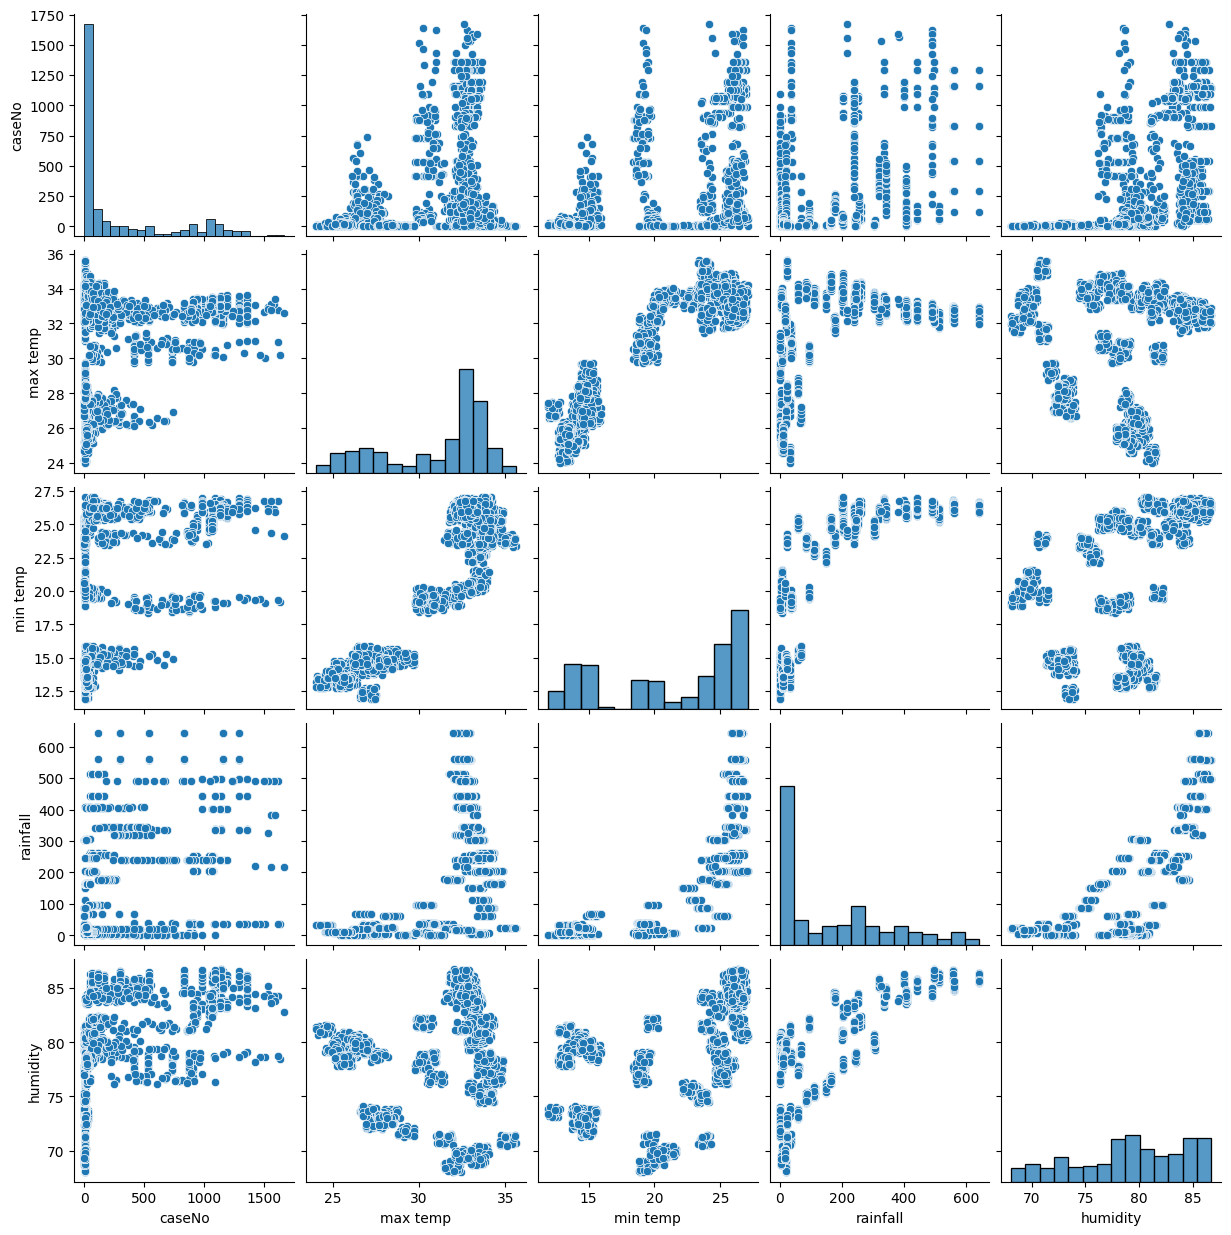

In [ ]:
import seaborn as sns

# Load dataset
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Select relevant columns
cols = ['caseNo', 'max temp', 'min temp', 'rainfall', 'humidity']

# Create pair plot
sns.pairplot(df[cols])
plt.savefig('hyperdimension')
plt.show()


In [ ]:
!pip install -U kaleido


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00


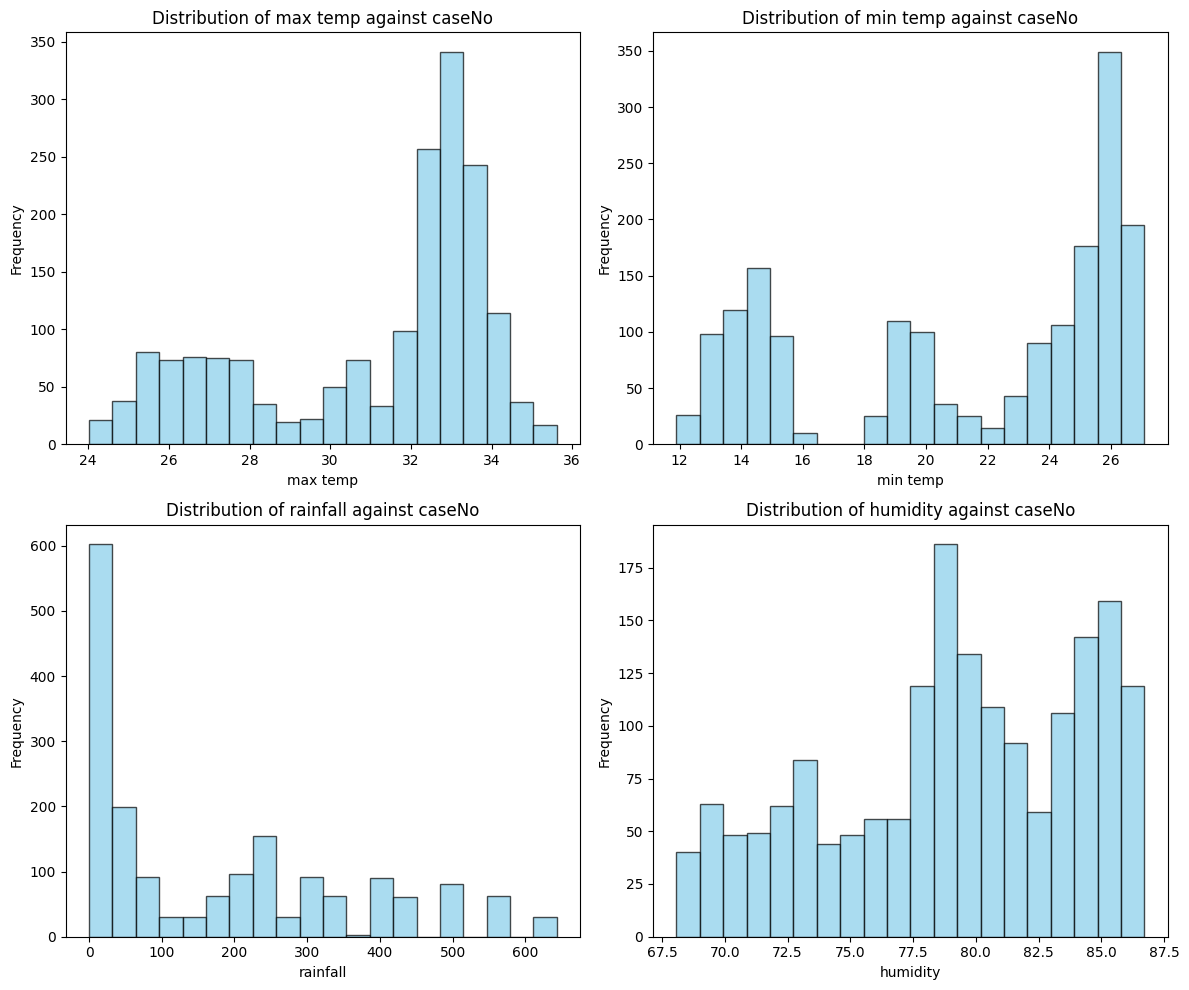

In [ ]:


# Load the dataset
# df = pd.read_csv("your_dataset.csv")

# Create subplots for each variable's distribution against 'caseNo'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

variables = ['max temp', 'min temp', 'rainfall', 'humidity']

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    ax.hist(df[var], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {var} against caseNo')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout()

# Save the plot as an image file
plt.savefig("distribution.png")

# Display the plot (optional)
plt.show()


1640


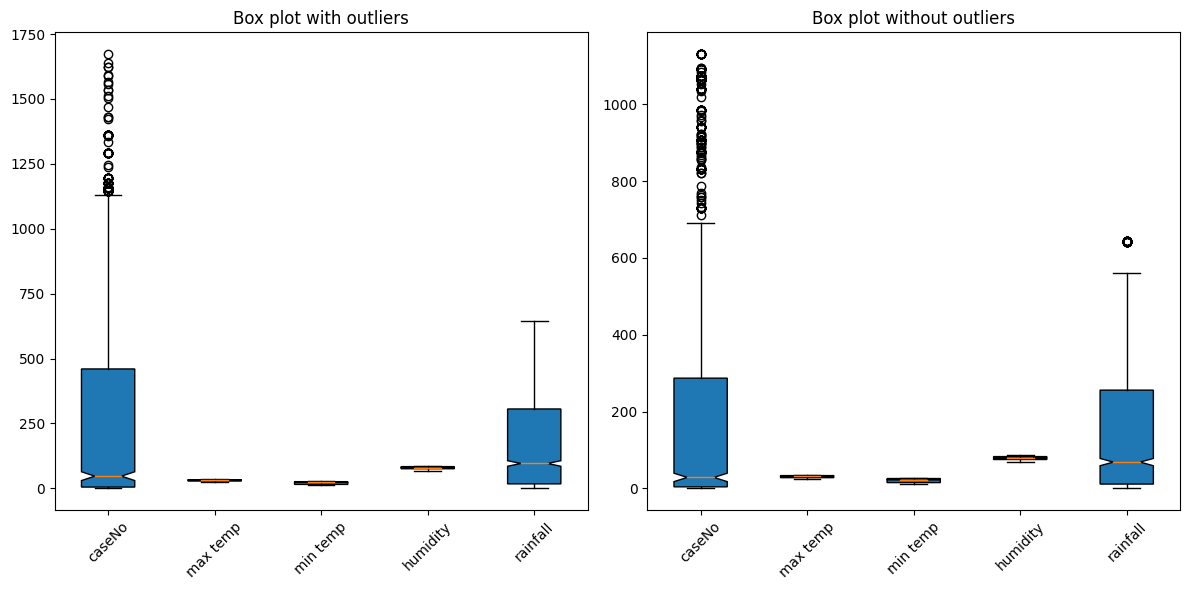

In [ ]:


# Load the dataset
#df = pd.read_csv("/content/DengueDataNoMissingValue.csv")

 #Drop the 'date' column (optional)
#df = df.drop(columns=['date'])  # Uncomment if needed

# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define threshold for identifying outliers
outlier_threshold = 1.5

# Identify outliers in "caseNo"
case_no_outliers = (df['caseNo'] < (Q1['caseNo'] - outlier_threshold * IQR['caseNo'])) | (df['caseNo'] > (Q3['caseNo'] + outlier_threshold * IQR['caseNo']))

# Remove outliers from the dataset (filtered data)
df_filtered = df[~case_no_outliers]

# Print the outliers for investigation (optional)
# print(df[case_no_outliers])
print(len(df_filtered))
# Plot box plots: with and without outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot with outliers
ax1.boxplot(df.values, labels=df.columns, notch=True, vert=True, patch_artist=True)
ax1.set_title("Box plot with outliers")
ax1.set_xticks(np.arange(1, len(df.columns) + 1), labels=df.columns, rotation=45)

# Plot without outliers (filtered data)
ax2.boxplot(df_filtered.values, labels=df_filtered.columns, notch=True, vert=True, patch_artist=True)
ax2.set_title("Box plot without outliers")
ax2.set_xticks(np.arange(1, len(df_filtered.columns) + 1), labels=df_filtered.columns, rotation=45)

plt.tight_layout()
plt.show()


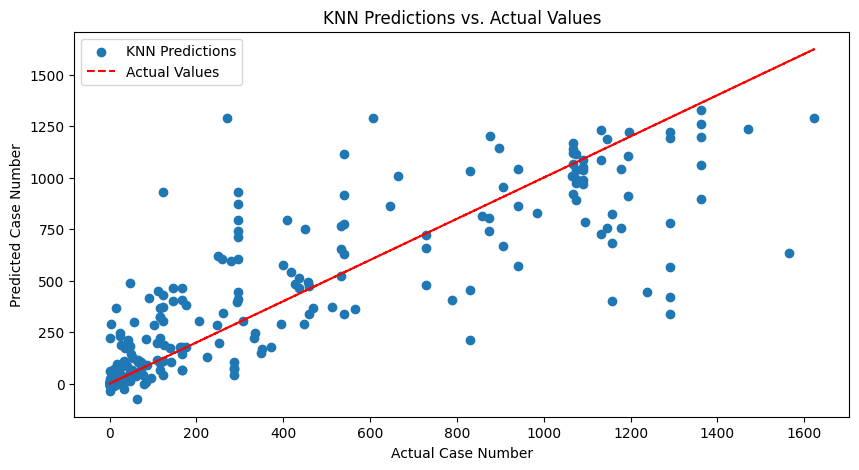

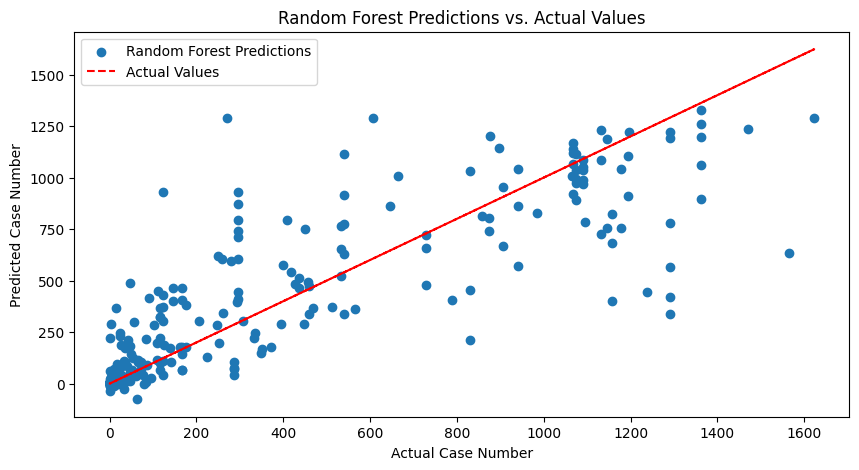

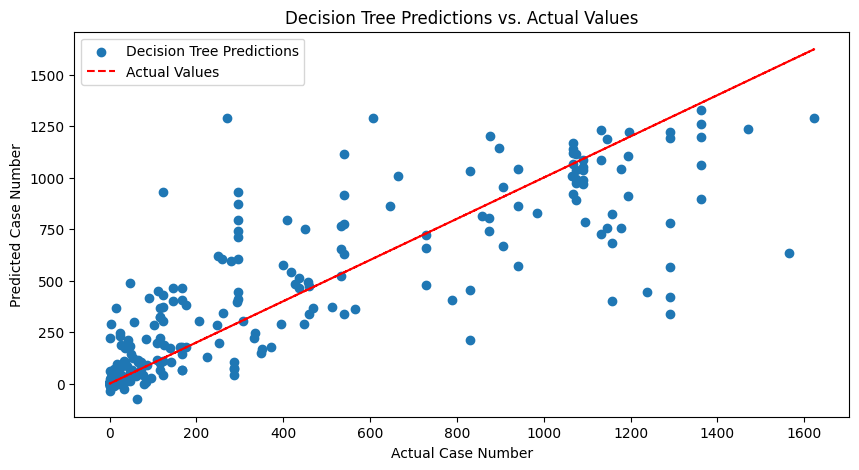

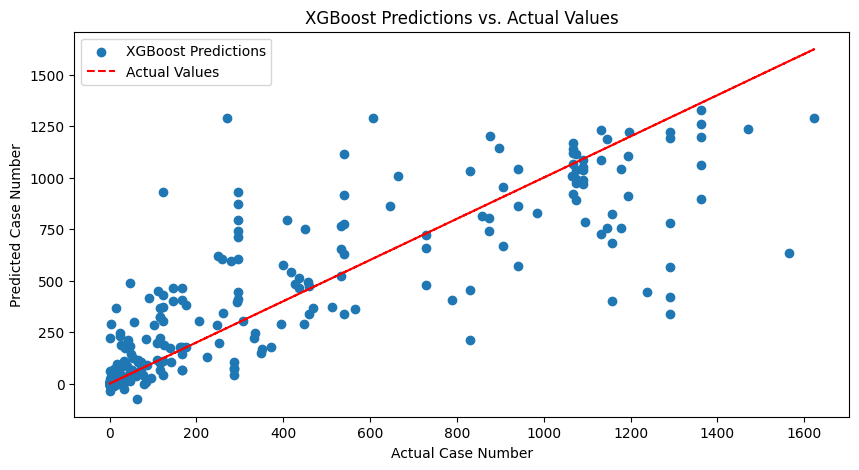

In [ ]:


# Perform cross-validation and evaluation

for name, model in models.items():

    # Plot predicted vs. actual values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, label=f"{name} Predictions")
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Values')
    plt.xlabel('Actual Case Number')
    plt.ylabel('Predicted Case Number')
    plt.title(f"{name} Predictions vs. Actual Values")
    plt.legend()
    plt.savefig(f"{name}.png")
    plt.show()





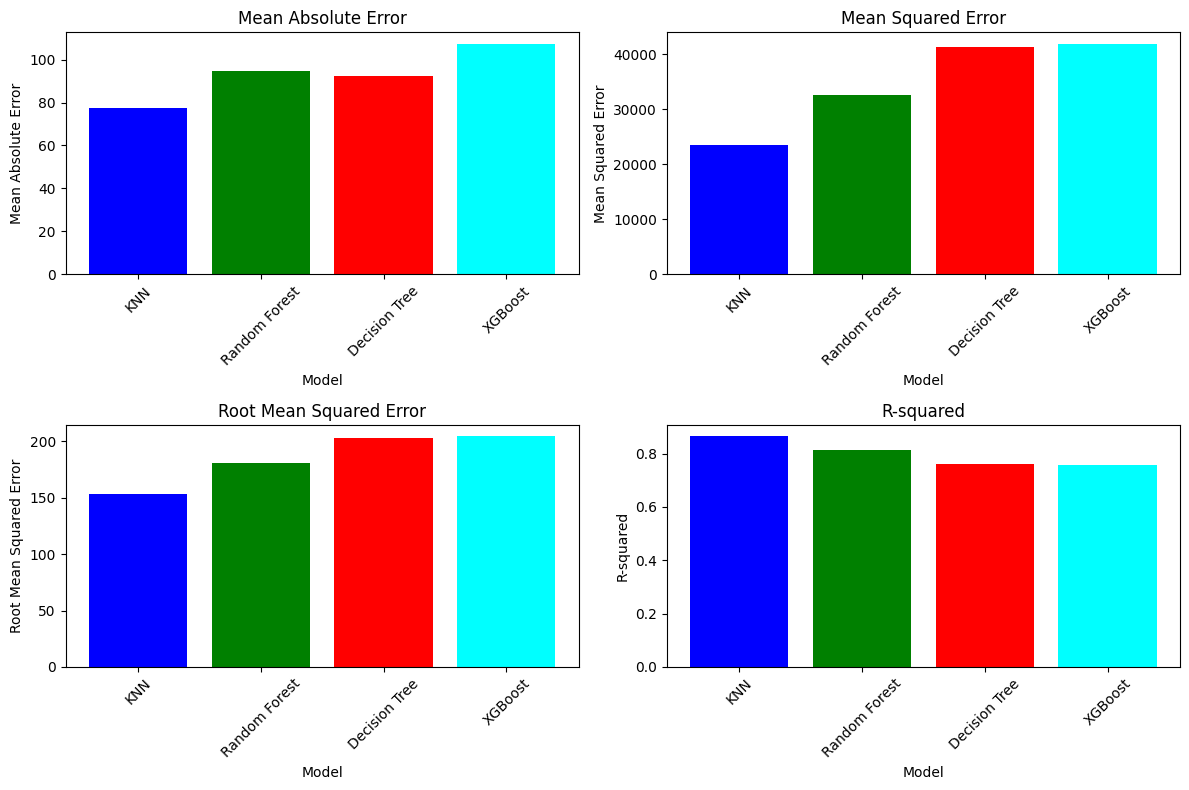

In [ ]:


# Plot comparison
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
scores = [mae_scores, mse_scores, rmse_scores, r2_scores]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(models.keys(), scores[i], color=['blue', 'green', 'red', 'cyan', 'magenta'])
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('comparison.png')
plt.show()

